In [1]:
from tensorflow import keras
import tensorflow as tf
from lib.utils import model, gan, preprocess, build

# Final MNIST models with Tanh activation

In [2]:
# We only store the training and test data without labels
(x,_), (y,_) = keras.datasets.mnist.load_data()
#resolution and number of channels
res = 28
channel = 1
# Preprocessing data with custom function
batch_size = 64
dataset = preprocess.preprocess_Data(x,y, False,res,channel,b_size=batch_size, isTanh=True)
#Essentials
img_shape = (res,res,channel)
epochs = 30
latent_dim = 100
#number of images to sample
n_images = 16
#seed matrix of random gaussian for tracking the same samples over training
s = tf.random.normal([n_images, latent_dim])
#to calculate losses
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# directories
checkpoint_dir = '../../../checkpoints/mnist_checkpoints/asc/batch'
image_dir = "../../../oDig/mnist/asc/batch"
image_freq = 10
#optimizers
d_optimizer = build.d_optimizer(0.0002)
g_optimizer = build.g_optimizer(0.0002)

2022-04-02 13:45:03.331201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 13:45:03.336222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 13:45:03.336582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 13:45:03.369113: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
name = 'A_NB_3-Tanh-MultiDrop'
model3 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=1,
                             is_multi_drop=True,
                             is_batchnorm=False,
                             is_tanh=True
                             )
gen3 ,disc3 = model.build(model3)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 3136)              316736    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 3136)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      131200    
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                         

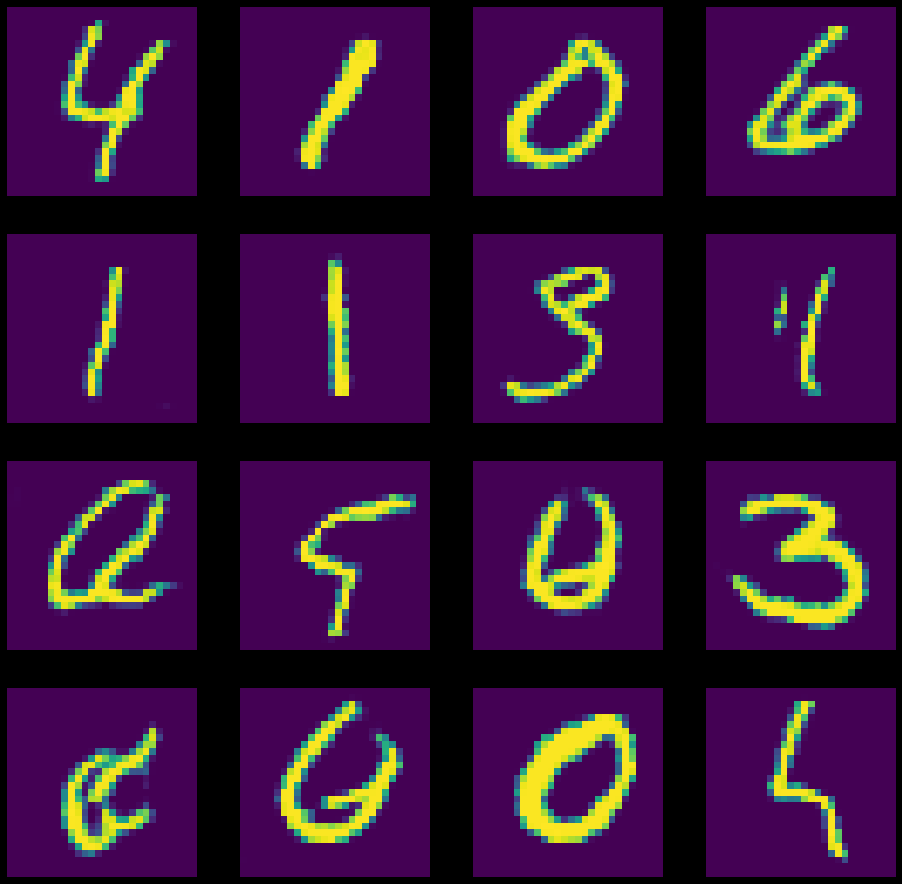

None
2188/2188 [==============================] - 40s 18ms/step - d_loss: 0.6910 - g_loss: 0.6556


In [4]:
g = gan.GAN(g = gen3, d = disc3, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [5]:
name = 'A_NB_5-Tanh-MultiDrop'
model5 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=8,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=1,
                             is_multi_drop=True,
                             is_batchnorm=False,
                             is_tanh=True
                             )
gen5 ,disc5 = model.build(model5)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 3136)              316736    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 3136)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 14, 14, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                         

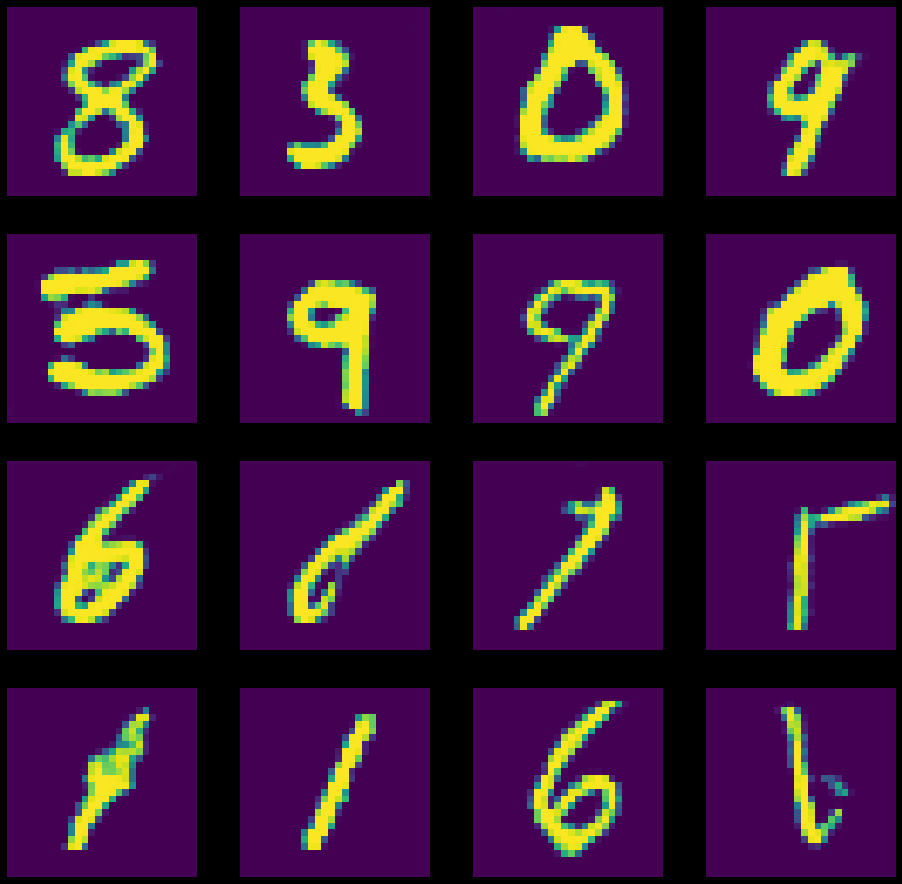

None
2188/2188 [==============================] - 50s 23ms/step - d_loss: 0.6132 - g_loss: 0.9204


In [6]:
g = gan.GAN(g = gen5, d = disc5, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [7]:
name = 'A_NB_9-Tanh-OneDrop'
model9 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=1,
                             is_multi_drop=False,
                             is_batchnorm=False,
                             is_tanh=True
                             )
gen9 ,disc9 = model.build(model9)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 3136)              316736    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 14, 14, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

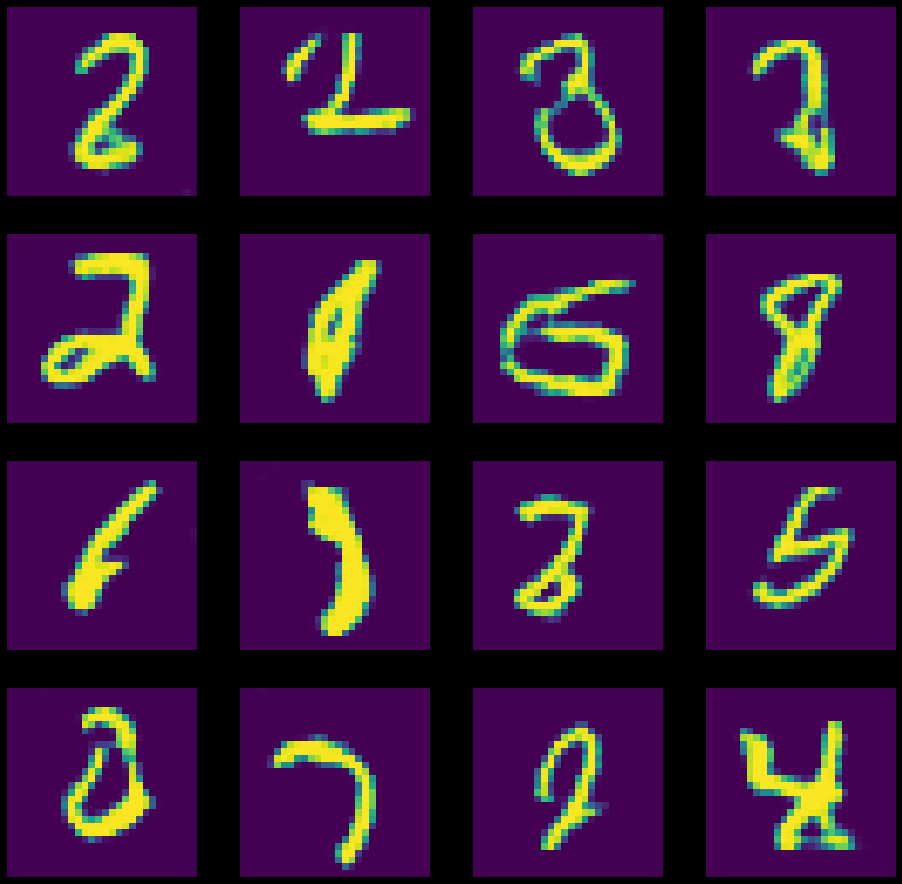

None
2188/2188 [==============================] - 43s 20ms/step - d_loss: 0.6648 - g_loss: 0.7424


In [8]:
g = gan.GAN(g = gen9, d = disc9, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [9]:
name = 'A_NB_10-Tanh-OneDrop'
model10 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=8,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=1,
                             is_multi_drop=False,
                             is_batchnorm=False,
                             is_tanh=True
                             )
gen10 ,disc10 = model.build(model10)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 3136)              316736    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 14, 14, 128)      131200    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

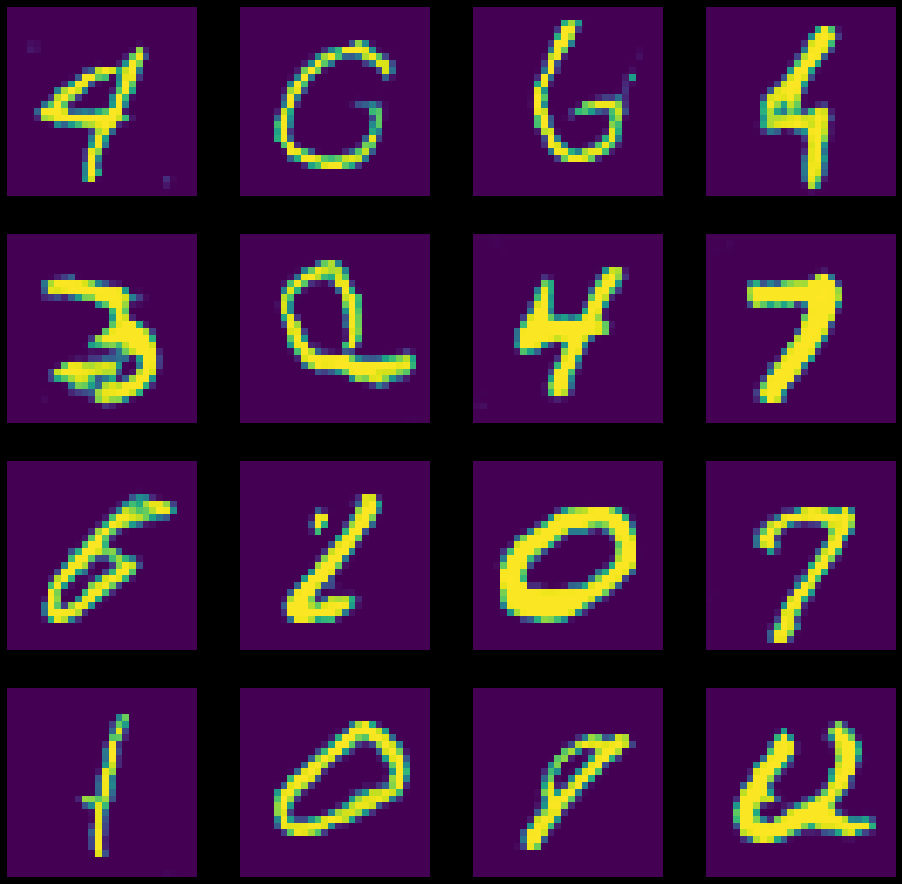

None
2188/2188 [==============================] - 49s 22ms/step - d_loss: 0.6108 - g_loss: 0.9284


In [10]:
g = gan.GAN(g = gen10, d = disc10, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

#batch

In [11]:
name = 'A_B_2-Tanh-MultiDrop'
model2 = model.ModelSettings(model_name=name,
                             gen_filter=6,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=1,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen2 ,disc2 = model.build(model2)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 1568)              158368    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 1568)              0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 32)          0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 14, 14, 64)       32832     
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                         

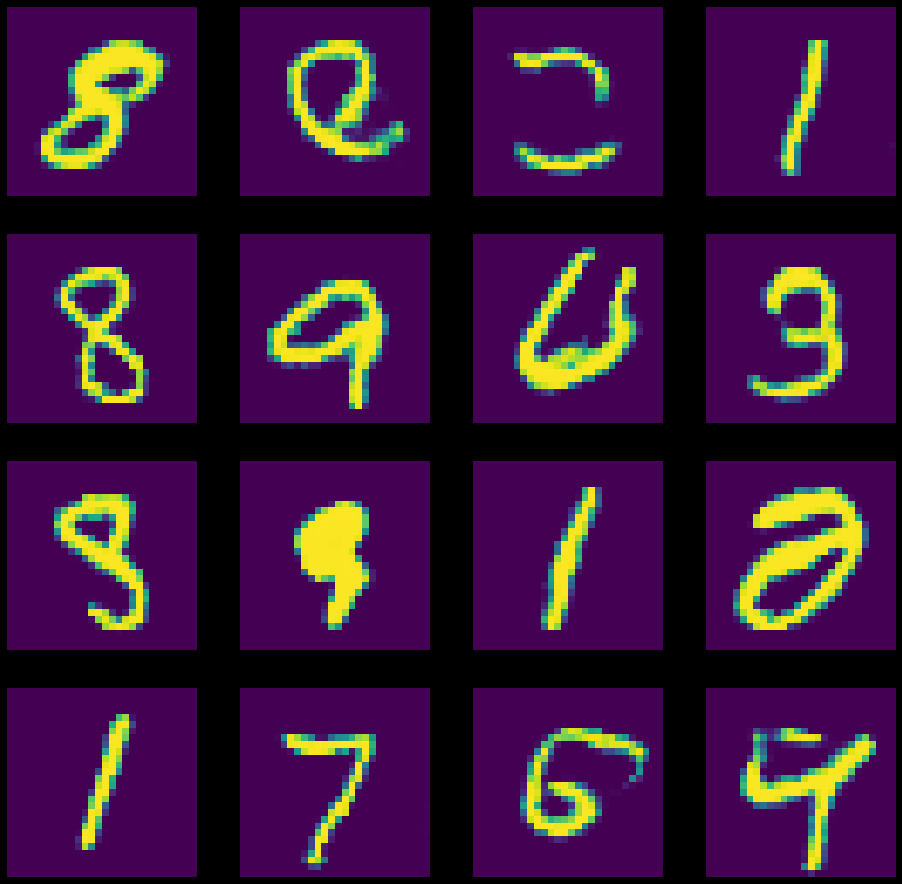

None
2188/2188 [==============================] - 19s 9ms/step - d_loss: 0.6678 - g_loss: 0.7265


In [12]:
g = gan.GAN(g = gen2, d = disc2, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [13]:
name = 'D_NB_2-Tanh-MultiDrop'
model2 = model.ModelSettings(model_name=name,
                             gen_filter=6,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=False,
                             is_tanh=True
                             )
gen2 ,disc2 = model.build(model2)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 6272)              633472    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 14, 14, 64)       131136    
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                         

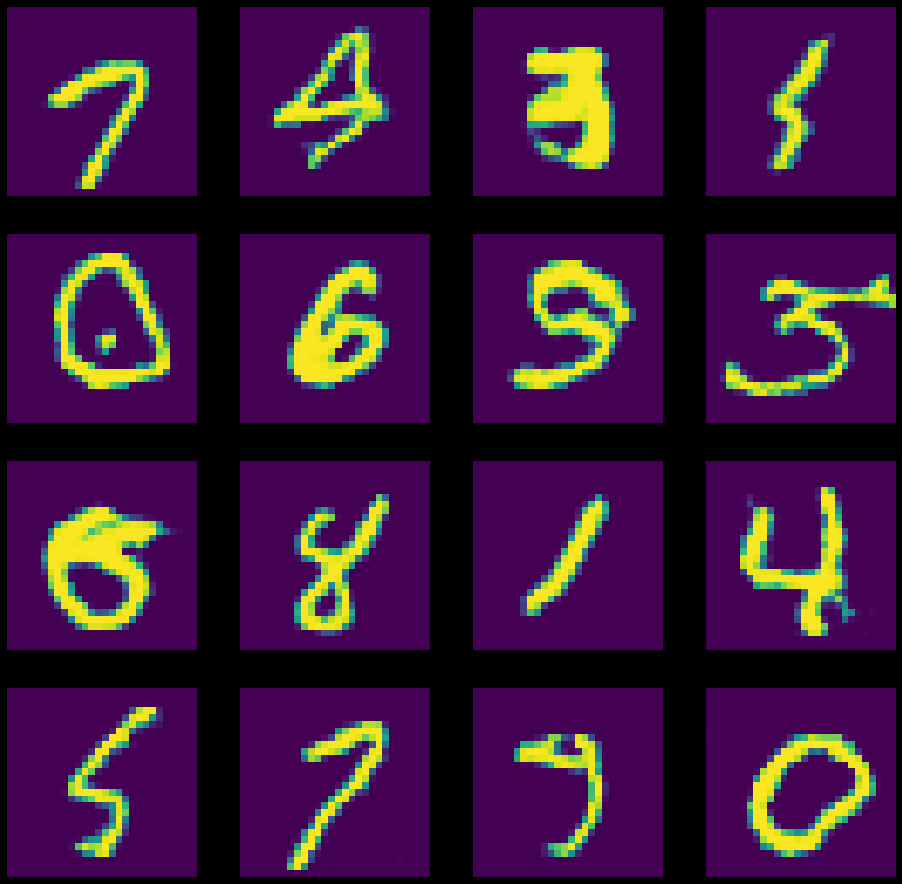

None
2188/2188 [==============================] - 15s 7ms/step - d_loss: 0.6805 - g_loss: 0.6964


In [14]:
g = gan.GAN(g = gen2, d = disc2, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [15]:
name = 'A_B_8-Tanh-OneDrop'
model8 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=1,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen8 ,disc8 = model.build(model8)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_12 (Dense)            (None, 3136)              316736    
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_6 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 14, 14, 128)      131200    
 Transpose)                                                      
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

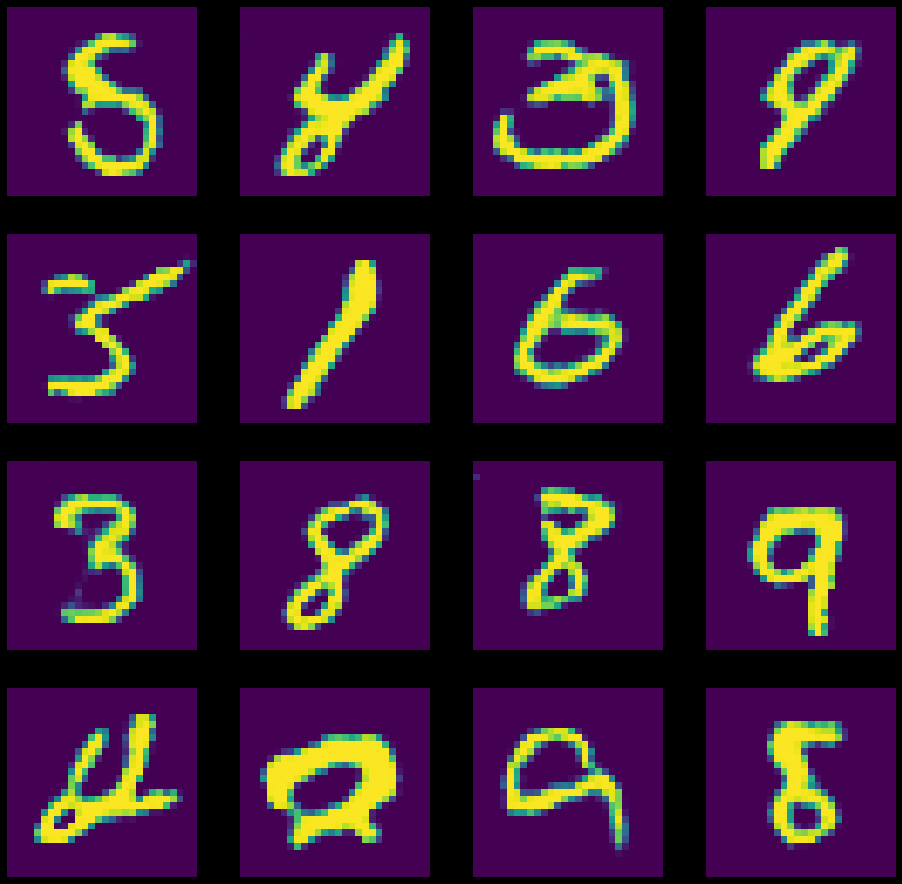

None
2188/2188 [==============================] - 40s 18ms/step - d_loss: 0.6886 - g_loss: 0.6661


In [16]:
g = gan.GAN(g = gen8, d = disc8, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [17]:
name = 'D_NB_3-Tanh-MultiDrop'
model3 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=False,
                             is_tanh=True
                             )
gen3 ,disc3 = model.build(model3)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_14 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_7 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

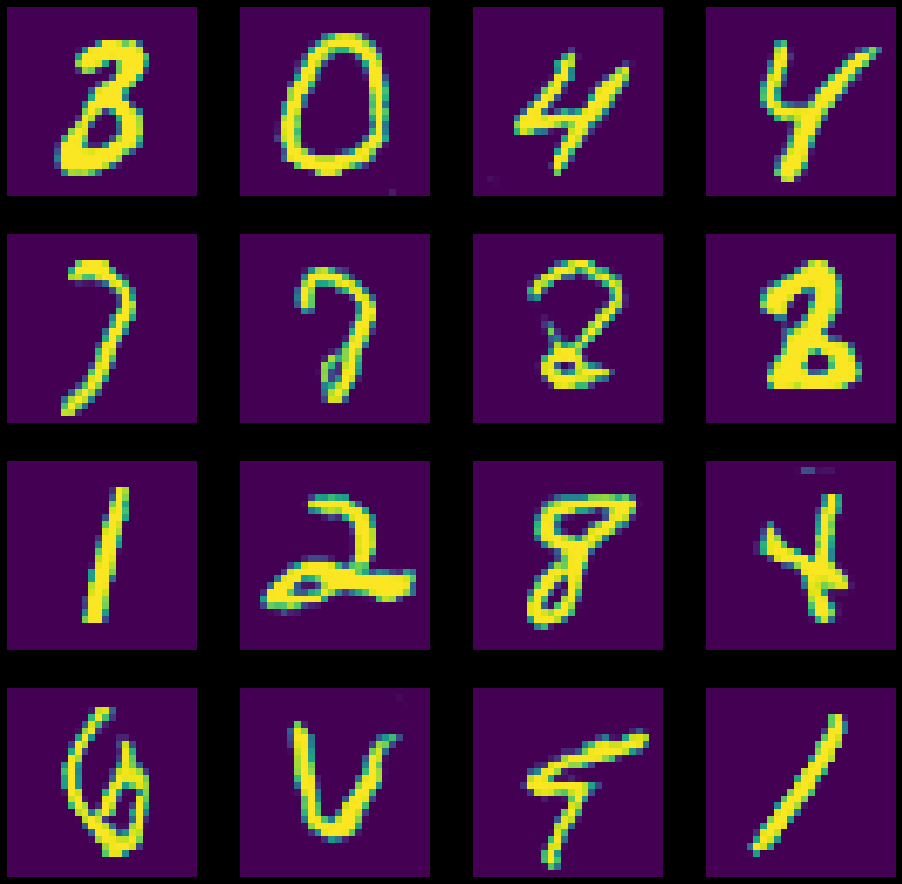

None
2188/2188 [==============================] - 27s 12ms/step - d_loss: 0.6911 - g_loss: 0.6569


In [18]:
g = gan.GAN(g = gen3, d = disc3, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [19]:
name = 'D_NB_4-Tanh-MultiDrop'
model4 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=False,
                             is_tanh=True
                             )
gen4 ,disc4 = model.build(model4)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_16 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_8 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_24 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

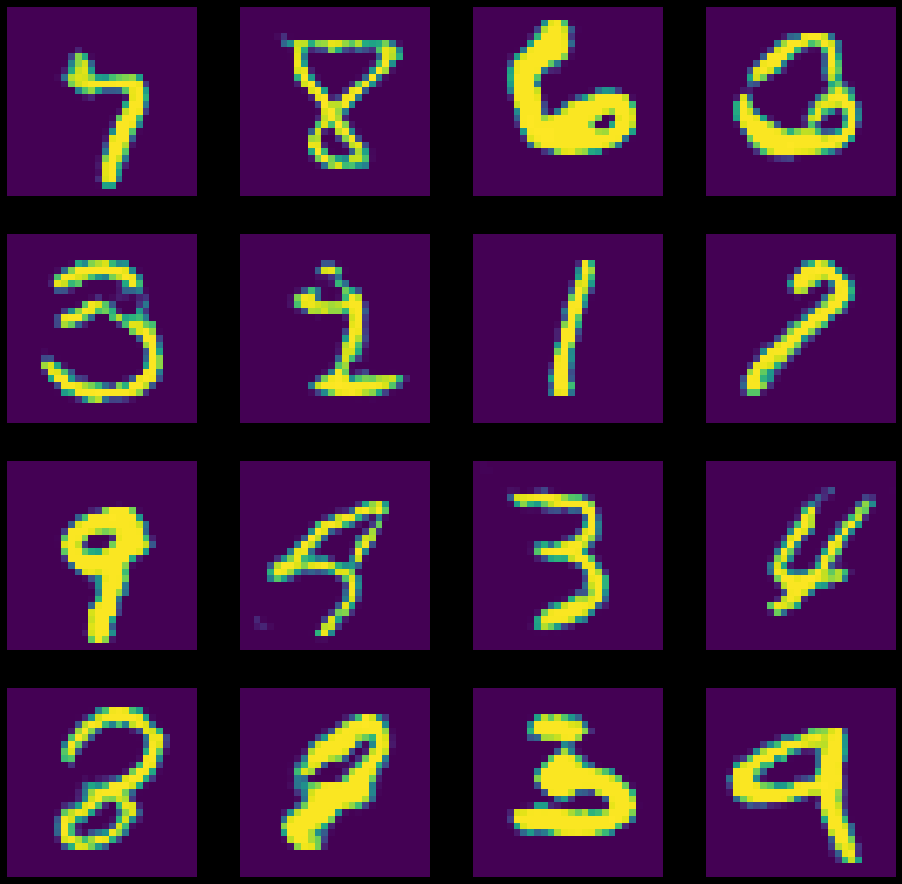

None
2188/2188 [==============================] - 30s 14ms/step - d_loss: 0.6681 - g_loss: 0.7329


In [20]:
g = gan.GAN(g = gen4, d = disc4, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [21]:
name = 'D_NB_5-Tanh-MultiDrop'
model5 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=8,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=False,
                             is_tanh=True
                             )
gen5 ,disc5 = model.build(model5)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_18 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_9 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_27 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

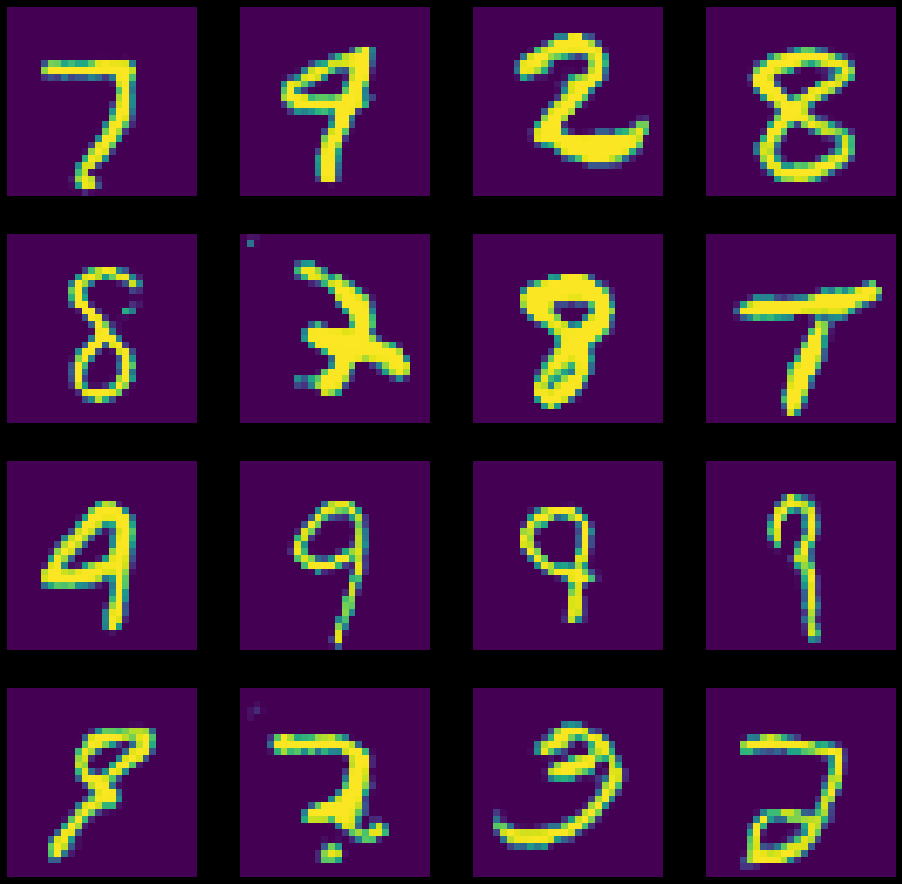

None
2188/2188 [==============================] - 39s 18ms/step - d_loss: 0.6193 - g_loss: 0.9051


In [22]:
g = gan.GAN(g = gen5, d = disc5, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [23]:
name = 'D_NB_19-Sig-OneDrop'
model19 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=False,
                             is_tanh=False
                             )
gen19, disc19 = model.build(model19)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_20 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_10 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_30 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

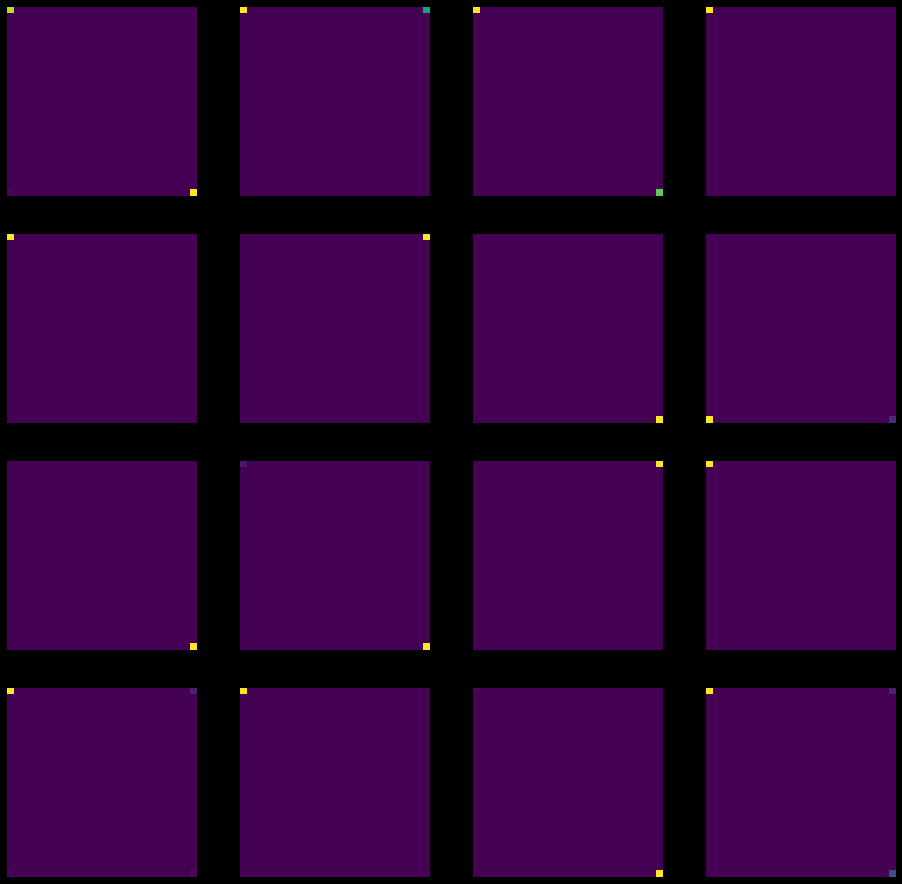

None
2188/2188 [==============================] - 28s 13ms/step - d_loss: -4739250688.0000 - g_loss: 344282.6250


In [24]:
g = gan.GAN(g=gen19, d=disc19, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

#Batch

In [25]:
name = 'D_B_8-Tanh-OneDrop'
model8 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen8 ,disc8 = model.build(model8)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_22 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_11 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_33 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

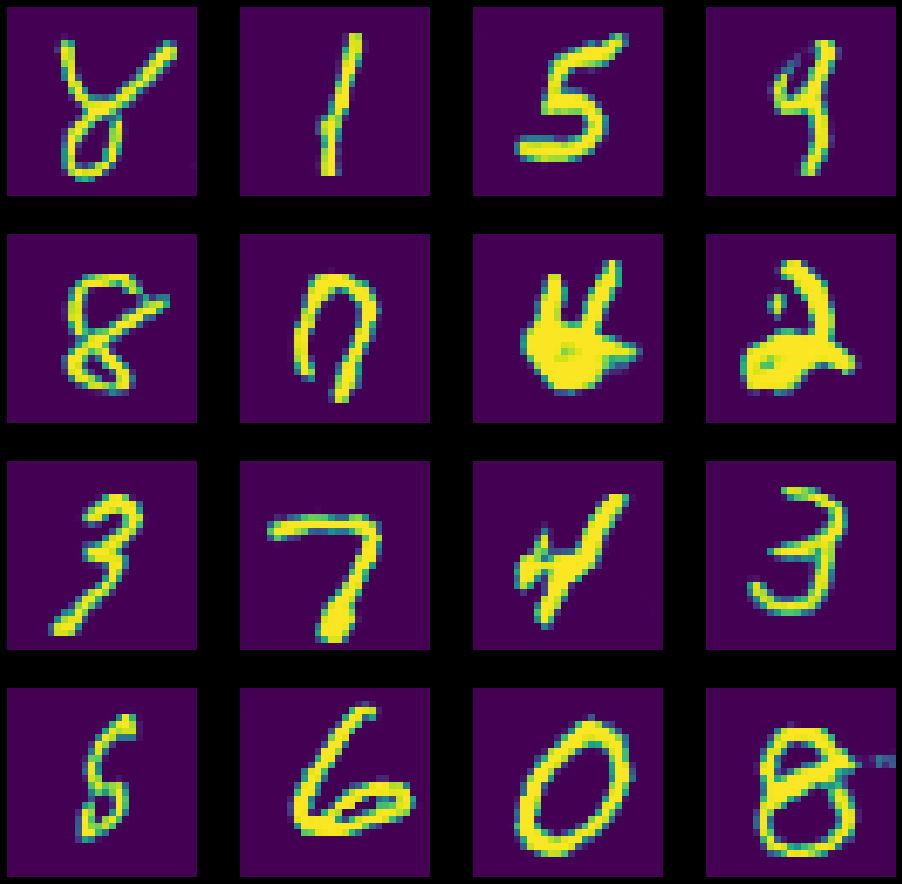

None
2188/2188 [==============================] - 38s 17ms/step - d_loss: 0.6898 - g_loss: 0.6598


In [26]:
g = gan.GAN(g = gen8, d = disc8, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [27]:
name = 'D_B_9-Tanh-OneDrop'
model9 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen9 ,disc9 = model.build(model9)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_24 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_62 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_12 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_36 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

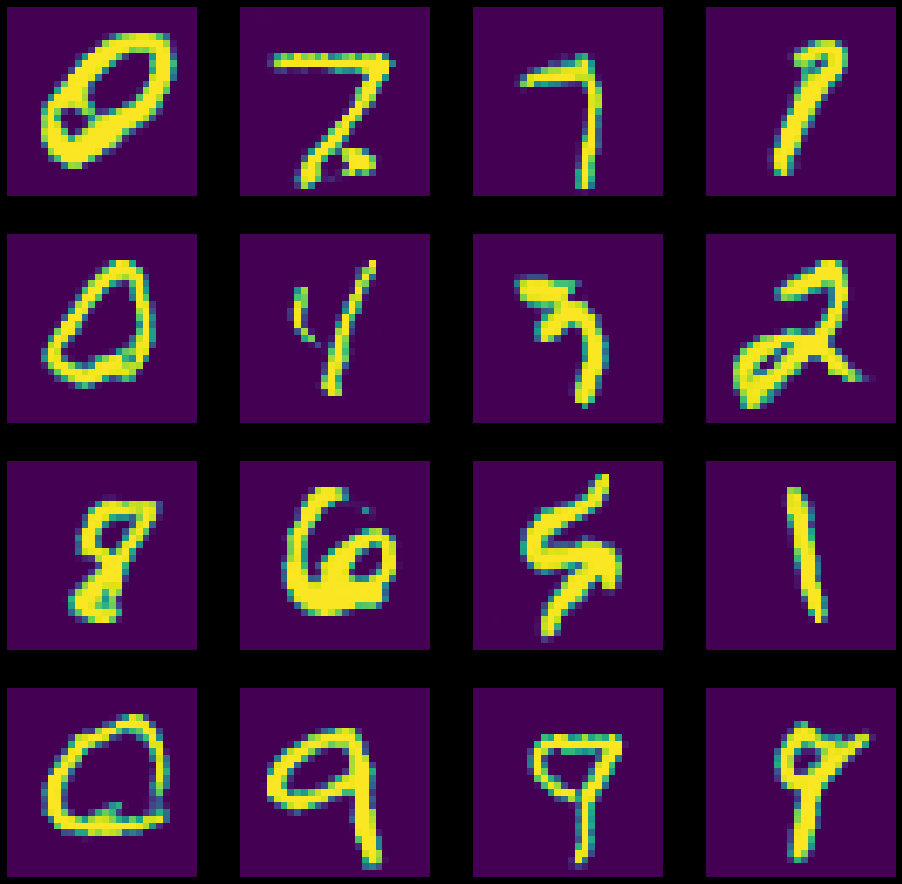

None
2188/2188 [==============================] - 31s 14ms/step - d_loss: 0.6694 - g_loss: 0.7272


In [28]:
g = gan.GAN(g = gen9, d = disc9, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [29]:
name = 'D_B_10-Tanh-OneDrop'
model10 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=8,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen10 ,disc10 = model.build(model10)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_26 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_67 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_13 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_39 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_65 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

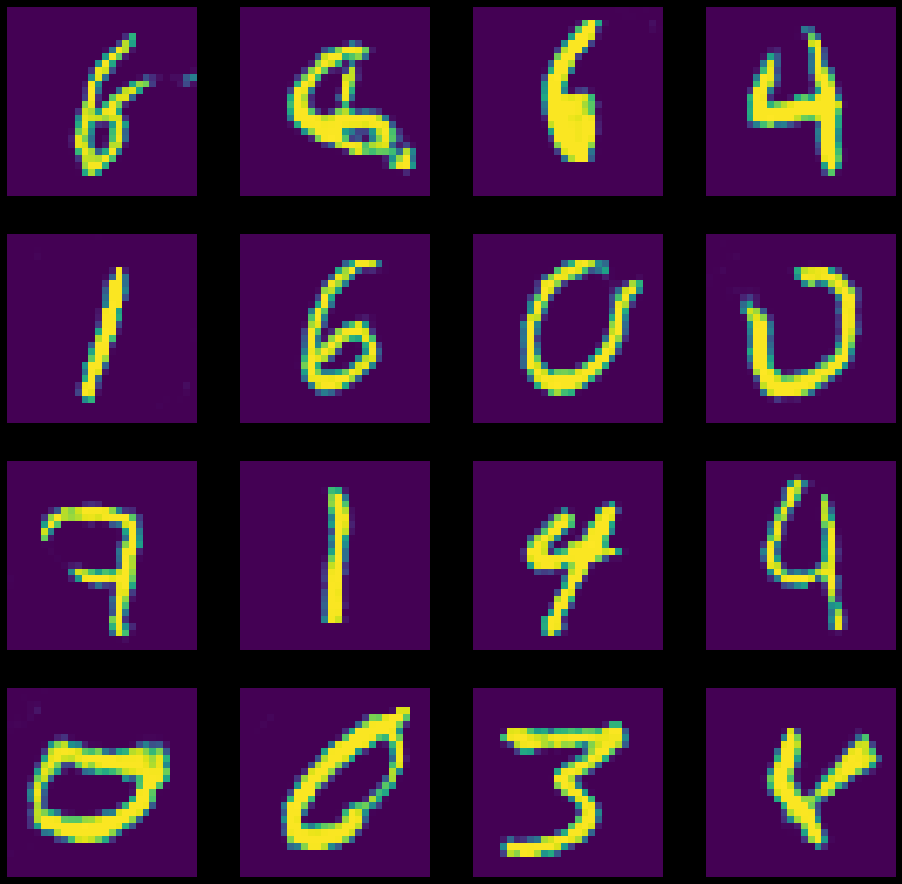

None
2188/2188 [==============================] - 43s 20ms/step - d_loss: 0.6110 - g_loss: 0.9317


In [30]:
g = gan.GAN(g = gen10, d = disc10, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

#SAME

In [31]:
name = 'S_NB_7-Tanh-OneDrop'
model7 = model.ModelSettings(model_name=name,
                             gen_filter=6,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=3,
                             is_multi_drop=False,
                             is_batchnorm=False,
                             is_tanh=True
                             )
gen7 ,disc7 = model.build(model7)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_28 (Dense)            (None, 3136)              316736    
                                                                 
 leaky_re_lu_72 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_14 (Reshape)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_42 (Conv2D  (None, 14, 14, 64)       65600     
 Transpose)                                                      
                                                                 
 leaky_re_lu_70 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                         

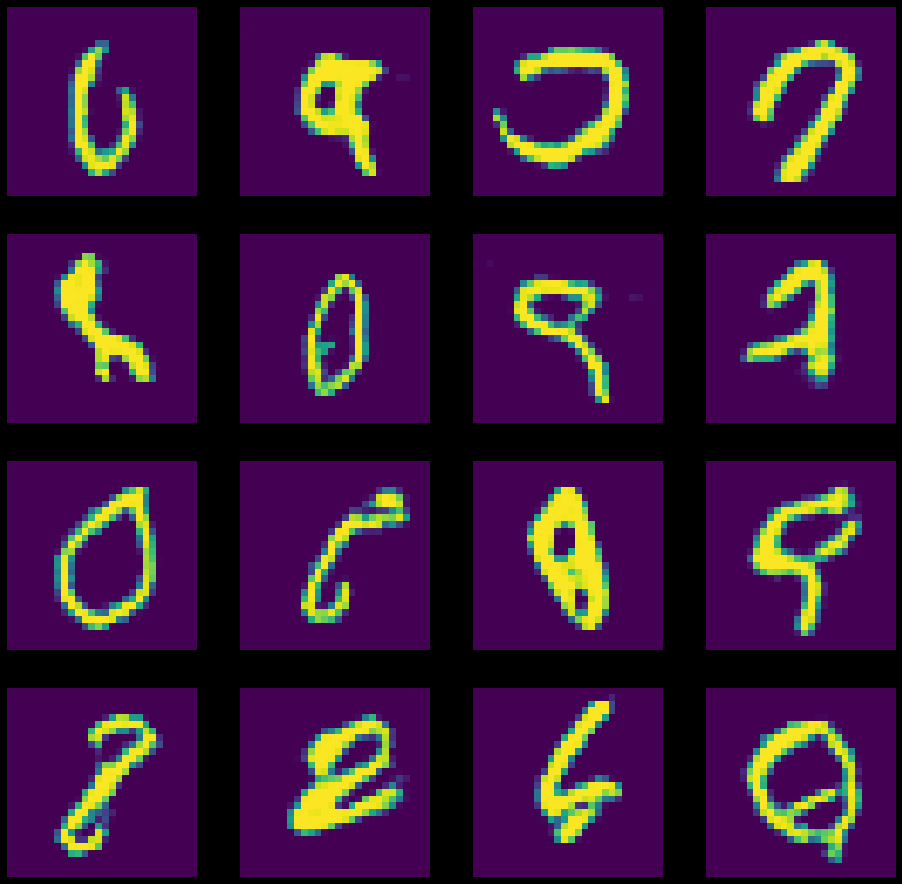

None
2188/2188 [==============================] - 17s 8ms/step - d_loss: 0.6629 - g_loss: 0.7470


In [32]:
g = gan.GAN(g = gen7, d = disc7, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

#Batch

In [33]:
name = 'S_B_2-Tanh-MultiDrop'
model2 = model.ModelSettings(model_name=name,
                             gen_filter=6,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=3,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen2 ,disc2 = model.build(model2)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_30 (Dense)            (None, 3136)              316736    
                                                                 
 leaky_re_lu_77 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_15 (Reshape)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_45 (Conv2D  (None, 14, 14, 64)       65600     
 Transpose)                                                      
                                                                 
 leaky_re_lu_75 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                         

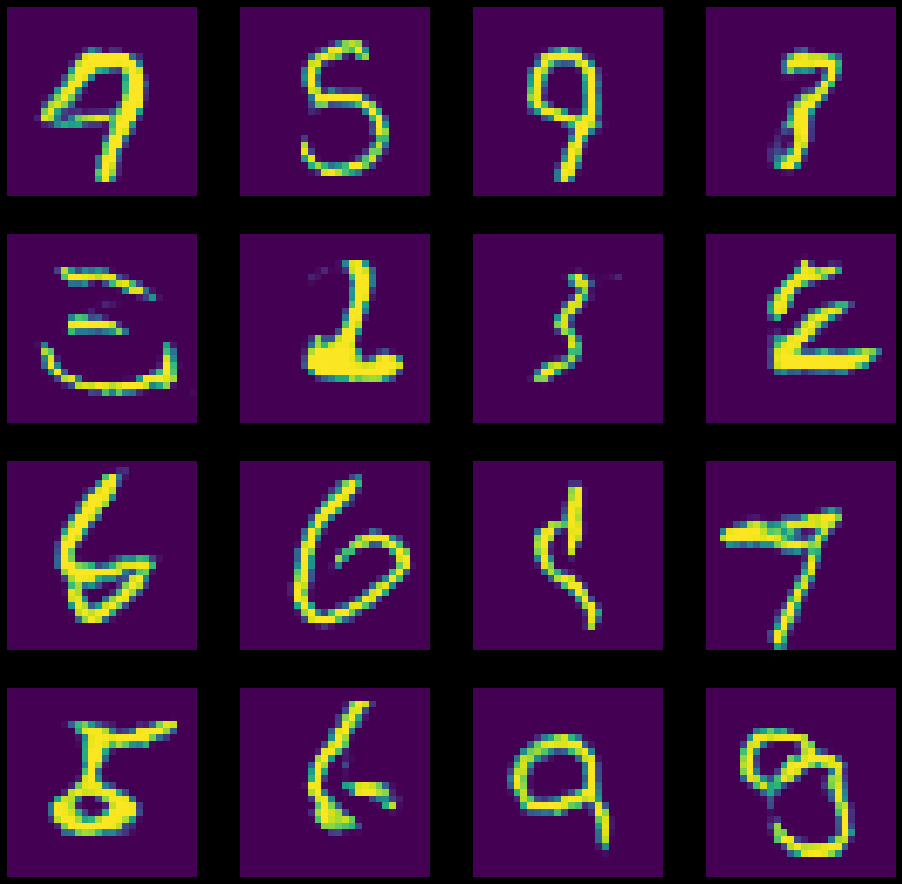

None
2188/2188 [==============================] - 16s 7ms/step - d_loss: 0.6581 - g_loss: 0.7622


In [34]:
g = gan.GAN(g = gen2, d = disc2, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [35]:
name = 'S_B_3-Tanh-MultiDrop'
model3 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=3,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen3 ,disc3 = model.build(model3)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_32 (Dense)            (None, 6272)              633472    
                                                                 
 leaky_re_lu_82 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_16 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_48 (Conv2D  (None, 14, 14, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_80 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

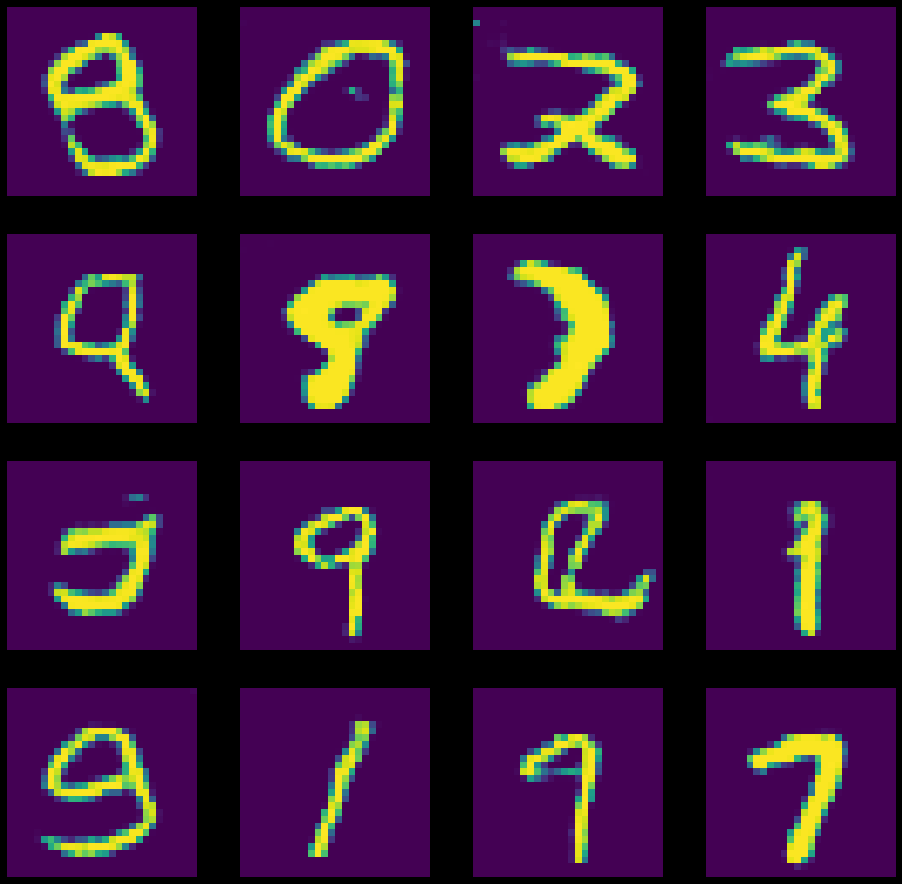

None
2188/2188 [==============================] - 30s 14ms/step - d_loss: 0.6842 - g_loss: 0.6793


In [36]:
g = gan.GAN(g = gen3, d = disc3, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [37]:
name = 'S_B_4-Tanh-MultiDrop'
model4 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=3,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen4 ,disc4 = model.build(model4)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_34 (Dense)            (None, 6272)              633472    
                                                                 
 leaky_re_lu_87 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_17 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_51 (Conv2D  (None, 14, 14, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_85 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

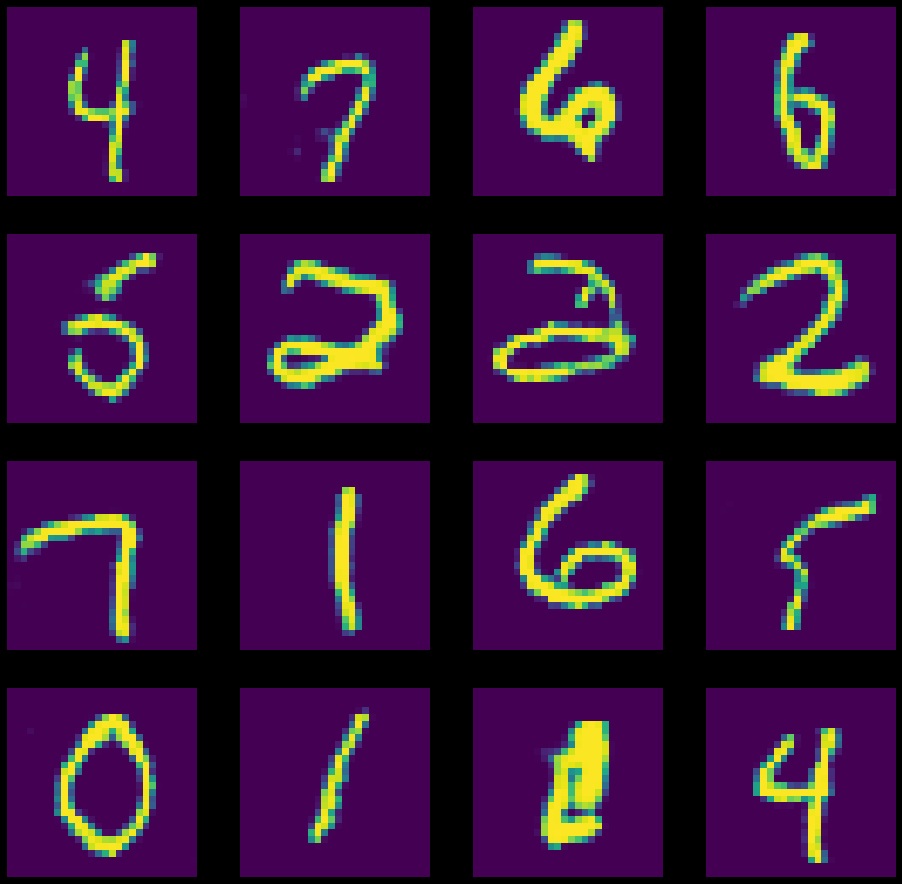

None
2188/2188 [==============================] - 34s 16ms/step - d_loss: 0.6547 - g_loss: 0.7813


In [38]:
g = gan.GAN(g = gen4, d = disc4, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])